# Perla Bot | Analytics
## Dataset exploration and descriptive analysis
### Perla beta 2, Aug 2020, raul@psicobotica.com 

<hr>
About Perla: <a herf="https://www.psicobotica.com/productos/psicologia-clinica/psicobotica-perla/">Perla Homepage at Psicobōtica</a>
<hr> 


## Anonymized dataset load from file
(direct load from github)



In [29]:
# Loading the table (CSV)

import pandas as pd 

# Using beta 2 dataset 2 version: 
perla_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/perla-bot/master/data/Perla-beta2-ds2-anon.csv"

perla_df = pd.read_csv(perla_dataset_path, header=0, delimiter=";") 

In [30]:
# Checking data load
perla_df.head()

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I4,I5,I6,I7,I8,I9,Gender,Age,Code,Delay
0,0,1,0,2,0,0,0,0,0,3,...,2,0,0,0,0,0,2,44,4ba596c4aefd8188d00162bfef57967c,0
1,0,3,3,3,0,3,0,0,0,12,...,3,0,3,0,0,0,1,43,fef2bf388aa21eace80757369757689c,1
2,1,1,1,1,1,0,0,0,0,5,...,1,0,0,0,0,0,2,39,00feb0b1986f985dab9ba216069c7bfe,2
3,0,0,1,0,0,0,1,0,0,2,...,1,0,0,0,0,0,2,37,b712daeaf10b3aac08eb2a88bae125eb,1
4,0,0,0,1,0,1,0,0,0,2,...,1,0,1,0,0,0,1,43,608af5455da8c250a87f81a5ed5c1942,1


In [31]:
# Checking types
perla_df.dtypes

PI1        int64
PI2        int64
PI3        int64
PI4        int64
PI5        int64
PI6        int64
PI7        int64
PI8        int64
PI9        int64
PPHQ9      int64
PHQ9       int64
I1         int64
I2         int64
I3         int64
I4         int64
I5         int64
I6         int64
I7         int64
I8         int64
I9         int64
Gender     int64
Age        int64
Code      object
Delay      int64
dtype: object

In [32]:
# Check number of qualified successfully anonymized participants
perla_df.Code.count()

78

In [33]:
# Check Nulls and NaNs
perla_df[perla_df.isnull().any(axis=1)]

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I4,I5,I6,I7,I8,I9,Gender,Age,Code,Delay


## Adding PHQ-9 Cut-Off based depression labels

In [34]:
import numpy as np

In [35]:
# If PHQ-9 reported by Perla is equal or higher than 10, we say the participant is depressed according to Perla
perla_df['PDepressed'] = np.where(perla_df['PPHQ9']>=10, 1, 0)

In [36]:
# If PHQ-9 reported by PHQ-9 form is equal or higher than 10, we say the participant is depressed according to PHQ-9 form.
perla_df['Depressed'] = np.where(perla_df['PHQ9']>=10, 1, 0)

In [37]:
perla_df.head()

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed
0,0,1,0,2,0,0,0,0,0,3,...,0,0,0,0,2,44,4ba596c4aefd8188d00162bfef57967c,0,0,0
1,0,3,3,3,0,3,0,0,0,12,...,3,0,0,0,1,43,fef2bf388aa21eace80757369757689c,1,1,1
2,1,1,1,1,1,0,0,0,0,5,...,0,0,0,0,2,39,00feb0b1986f985dab9ba216069c7bfe,2,0,0
3,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,2,37,b712daeaf10b3aac08eb2a88bae125eb,1,0,0
4,0,0,0,1,0,1,0,0,0,2,...,1,0,0,0,1,43,608af5455da8c250a87f81a5ed5c1942,1,0,0


In [59]:
# Depression detection statistics 

numPosPerla = perla_df['PDepressed'].value_counts()[1]
numPosForm = perla_df['Depressed'].value_counts()[1]
numNegPerla = perla_df['PDepressed'].value_counts()[0]
numNegForm = perla_df['Depressed'].value_counts()[0]

ratioPosPerla = numPosPerla / perla_df['PDepressed'].count()
ratioPosForm = numPosForm / perla_df['Depressed'].count()

print("Positive cases (Perla): " + str(numPosPerla) + " (" + str(ratioPosPerla*100)[0:5] + "%)")
print("Positive cases (Form): " + str(numPosForm) + " (" + str(ratioPosForm*100)[0:5] + "%)")
print("Negative cases (Perla): " + str(numNegPerla) + " (" + str((1-ratioPosPerla)*100)[0:5] + "%)" )
print("Negative cases (Form): " + str(numNegForm) + " (" + str((1-ratioPosForm)*100)[0:5] + "%)" )

Positive cases (Perla): 22 (28.20%)
Positive cases (Form): 16 (20.51%)
Negative cases (Perla): 56 (71.79%)
Negative cases (Form): 62 (79.48%)


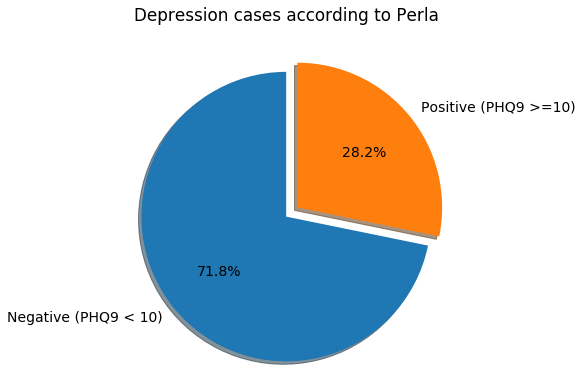

In [62]:
# Class counts (Perla)
labels = 'Negative (PHQ9 < 10)', 'Positive (PHQ9 >=10)'
sizes = [numNegPerla, numPosPerla]
explode = (0.05, 0.05)
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
fig1.suptitle('Depression cases according to Perla')
plt.show()

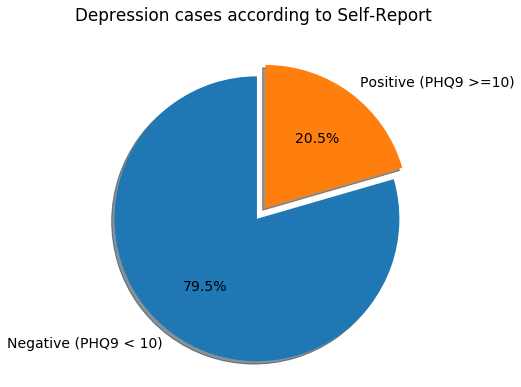

In [63]:
# Class counts (Perla)
labels = 'Negative (PHQ9 < 10)', 'Positive (PHQ9 >=10)'
sizes = [numNegForm, numPosForm]
explode = (0.05, 0.05)
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
fig2.suptitle('Depression cases according to Self-Report')
plt.show()

## Distribution analysis

In [64]:
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 14})

Text(0.5, 1.0, 'Delay (days) between tests')

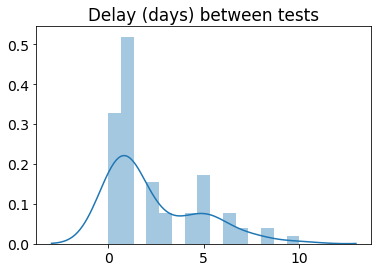

In [67]:
# Delay distribution
sns.distplot(perla_df[["Delay"]], bins=15, kde=True).set_title('Delay (days) between tests')

Text(0.5, 1.0, 'Age Distribution')

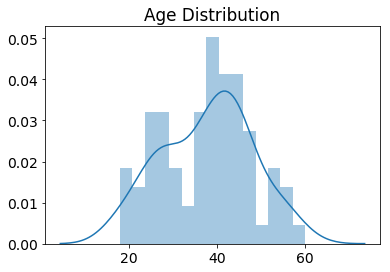

In [65]:
# Age distribution
sns.distplot(perla_df[["Age"]], bins=15, kde=True).set_title('Age Distribution')

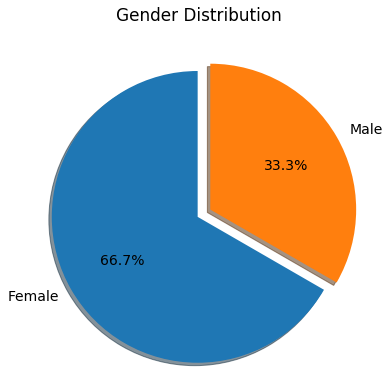

In [66]:
# Gender distribution
labels = 'Female', 'Male'
sizes = [perla_df['Gender'].value_counts()[2], perla_df['Gender'].value_counts()[1]]
explode = (0.05, 0.05)
fig3, ax3 = plt.subplots(figsize=(6,6))
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
fig3.suptitle('Gender Distribution')
plt.show()

## Save dataset with classes

In [68]:
# Dataset with classification (both Perla and Form)
perla_class_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Perla-Dataset\\Perla-beta2-ds2-classes.csv"
perla_df.to_csv(perla_class_dataset_path, sep=';', encoding='utf-8', index=False)